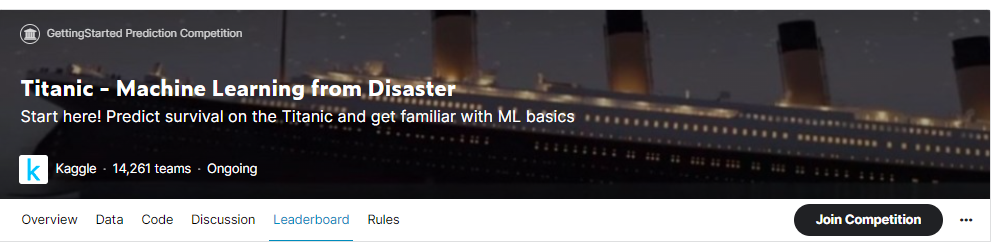

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [79]:
df_tr=pd.read_csv('E:\\My projects\\Kaggle titanic\\train.csv')
df_tr.head(2)

# df_tr means df training data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [80]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
df_tr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data cleaning

In [82]:
df_tr.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:
mean= df_tr['Age'].mean()
print(mean)

mode = df_tr['Embarked'].mode()[0]
print(mode)

mode1 = df_tr['Cabin'].mode()[0]
print(mode1)

29.69911764705882
S
B96 B98


## fillna( )

In [84]:
df_tr['Age'].fillna(mean,inplace=True)
df_tr['Embarked'].fillna(mode,inplace=True)
df_tr['Cabin'].fillna(mode1,inplace=True)

In [85]:
df_tr.isna().sum()  #  now data has no missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [86]:
df_tr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


### checking data is normal or not

In [87]:
print(df_tr['Fare'].skew())
print(df_tr['Age'].skew())

4.787316519674893
0.4344880940129925


In [88]:
# making data normal

df_tr['sqr_Fare']=df_tr['Fare']**(1/4.7)
print(df_tr['sqr_Fare'].skew())

0.00982006067812734


<AxesSubplot:xlabel='sqr_Fare'>

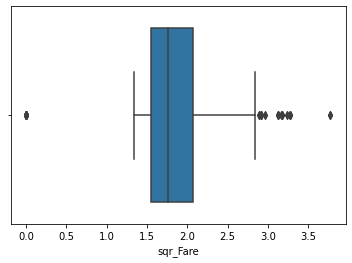

In [89]:
sns.boxplot(x=df_tr['sqr_Fare'])

<AxesSubplot:>

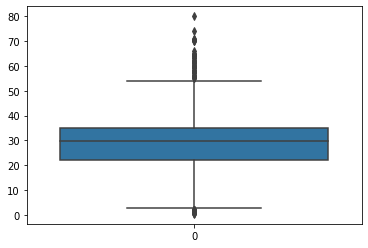

In [90]:
sns.boxplot(data=df_tr['Age'])

In [91]:
## df_tr.nunique()
# changing column name 
# df.rename(columns={'old_name': 'new_name'},inplace = True)

In [92]:
#! pip install feature_engine

### now handling with outliers

In [93]:
from feature_engine.outliers import Winsorizer

win=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['Age','sqr_Fare'])

df_tr[['Age','sqr_Fare']]=win.fit_transform(df_tr[['Age','sqr_Fare']])

<AxesSubplot:xlabel='sqr_Fare'>

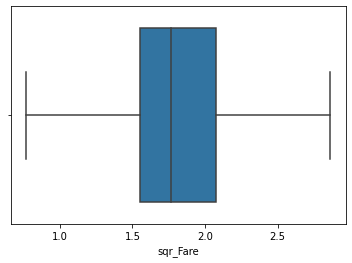

In [94]:
sns.boxplot(x=df_tr['sqr_Fare'])

In [95]:
df_tr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sqr_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S,1.524230
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,2.478864
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1.553375
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,2.328313
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S,1.558556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S,1.725875
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,2.061964
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S,1.956680
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,2.061964


<AxesSubplot:xlabel='sqr_Fare'>

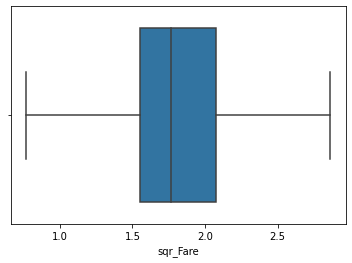

In [97]:
sns.boxplot(x=df_tr['sqr_Fare'])

In [98]:
df_tr1=df_tr.drop(columns=['PassengerId','Name','Ticket','Fare','Cabin'])
df_tr1

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,sqr_Fare
0,0,3,male,22.000000,1,0,S,1.524230
1,1,1,female,38.000000,1,0,C,2.478864
2,1,3,female,26.000000,0,0,S,1.553375
3,1,1,female,35.000000,1,0,S,2.328313
4,0,3,male,35.000000,0,0,S,1.558556
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S,1.725875
887,1,1,female,19.000000,0,0,S,2.061964
888,0,3,female,29.699118,1,2,S,1.956680
889,1,1,male,26.000000,0,0,C,2.061964


In [99]:
df_tr1.rename(columns={'sqr_Fare':'Fare'},inplace=True)

In [100]:
df_tr1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
0,0,3,male,22.0,1,0,S,1.524230
1,1,1,female,38.0,1,0,C,2.478864


In [105]:
from sklearn.preprocessing import LabelEncoder

# call the func
le=LabelEncoder()

# fit and transform

df_tr1['Sex']= le.fit_transform(df_tr1['Sex'])
df_tr1

df_tr1['Embarked']=le.fit_transform(df_tr1['Embarked'])
df_tr1



,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
0,0,3,1,22.000000,1,0,2,1.524230
1,1,1,0,38.000000,1,0,0,2.478864
2,1,3,0,26.000000,0,0,2,1.553375
3,1,1,0,35.000000,1,0,2,2.328313
4,0,3,1,35.000000,0,0,2,1.558556
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,2,1.725875
887,1,1,0,19.000000,0,0,2,2.061964
888,0,3,0,29.699118,1,2,2,1.956680
889,1,1,1,26.000000,0,0,0,2.061964


In [110]:
from sklearn.preprocessing import MaxAbsScaler

# call func
mas=MaxAbsScaler()

# fit_transform
df_tr1['Age']=mas.fit_transform(df_tr1[['Age']])

df_tr1['Fare']=mas.fit_transform(df_tr1[['Fare']])

In [112]:
df_tr1.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
0,0,3,1,0.403670,1,0,2,0.532603
1,1,1,0,0.697248,1,0,0,0.866175


## Train Test Split

In [113]:
# first find x and y

In [115]:
x=df_tr1.drop(columns=['Survived'])
x.head(2)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
0,3,1,0.403670,1,0,2,0.532603
1,1,0,0.697248,1,0,0,0.866175


In [117]:
y=df_tr1['Survived']
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=99)

## Modelling

In [121]:
#! pip install xgboost

In [125]:
from xgboost import XGBClassifier
#help(XGBClassifier)

xg_model=XGBClassifier()

xg_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [126]:
# now predicting over x_train & predicting over X_test 

y_pred_train=xg_model.predict(x_train)

y_pred_test = xg_model.predict(x_test)

In [129]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))   # train accu
print(accuracy_score(y_test,y_pred_test))

0.9730538922155688
0.8385650224215246


In [133]:
from sklearn.model_selection import cross_val_score

acc= cross_val_score(estimator=xg_model,X=x_train,y=y_train,cv=5)
acc.mean()

0.8038716193468746

In [134]:
from sklearn.model_selection import GridSearchCV

In [136]:
xg_model = XGBClassifier()
param_grid={'n_estimators':[1,5,12,17,20,50],'max_depth':[3,4,5,6],'gamma':[0,3]}
grid = GridSearchCV(xg_model,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [137]:
grid.best_params_

{'gamma': 0, 'max_depth': 4, 'n_estimators': 50}

In [139]:
predictions = grid.predict(x_test)


In [142]:
#print(classification_report(y_test,predictions))

In [143]:
grid.best_estimator_.feature_importances_

array([0.15767032, 0.6412118 , 0.03816468, 0.0634597 , 0.01888428,
       0.04274383, 0.03786531], dtype=float32)

# logistic model

In [144]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [145]:
y_pred=log_model.predict(x_test)

pd.DataFrame(y_pred).head()

,0
0,1
1,1
2,0
3,0
4,1


In [146]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [147]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7623318385650224

In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[121,  24],
       [ 29,  49]], dtype=int64)

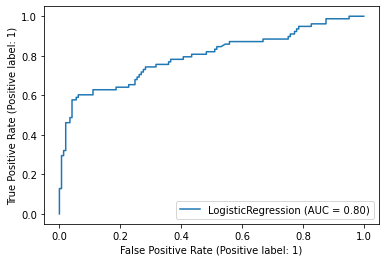

In [149]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,x_test,y_test)

In [150]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(log_model,x,y,cv=5)
print('cross val score',scores.mean())

cross val score 0.78788525516289


In [151]:
log_model.score(x_test,y_test),log_model.score(x_train,y_train)    #test acc and train accu

(0.7623318385650224, 0.812874251497006)

# Random Forest

In [198]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=20)

rf_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [199]:
y_pred_train=rf_model.predict(x_train)
y_pred_test=rf_model.predict(x_test)

### Evaluation

In [200]:
from sklearn.metrics import accuracy_score
print('train_accu',accuracy_score(y_pred_train,y_train))
print('test_accu',accuracy_score(y_pred_test,y_test))

train_accu 0.9835329341317365
test_accu 0.8161434977578476


In [201]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(rf_model,x,y,cv=5)
print('cross val score',scores.mean())

cross val score 0.798022722992907


In [189]:
rf_model = RandomForestClassifier()
param_grid={'n_estimators':list(range(1,101))}
grid = GridSearchCV(rf_model,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 73}

# Gradient boost

In [184]:
from sklearn.ensemble import GradientBoostingClassifier

g_model = GradientBoostingClassifier(n_estimators=1,learning_rate=0.9)

g_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.9, n_estimators=1)

In [185]:
y_pred_train = g_model.predict(x_train)

y_pred_test = g_model.predict(x_test)

### Evaluation

In [186]:
## accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.8323353293413174
0.7847533632286996


In [188]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(g_model,x,y,cv=5)
print('cross val score',scores.mean())

cross val score 0.8091959073504487


In [183]:
g_model = GradientBoostingClassifier()
param_grid={'n_estimators':[1,5,12,17,20,50],'learning_rate':[0.1,0.2,0.3,0.4,0.5,1]}
grid = GridSearchCV(g_model,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.best_params_

{'learning_rate': 1, 'n_estimators': 12}

#  Test Data

In [61]:
df_te=pd.read_csv('E:\\My projects\\Kaggle titanic\\test.csv')
df_te.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [63]:
df_te.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [64]:
df_te.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [65]:
mean= df_te['Age'].mean()
print(mean)

mode = df_te['Embarked'].mode()[0]
print(mode)

mode1 = df_te['Cabin'].mode()[0]
print(mode1)

30.272590361445783
S
B57 B59 B63 B66


In [66]:
df_te['Age'].fillna(mean,inplace=True)
df_te['Embarked'].fillna(mode,inplace=True)
df_te['Cabin'].fillna(mode1,inplace=True)

In [67]:
a=df_te['Fare'].mean()
df_te['Fare'].fillna(a,inplace=True)

In [68]:
df_te.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [69]:
# now data is no missing values

<AxesSubplot:>

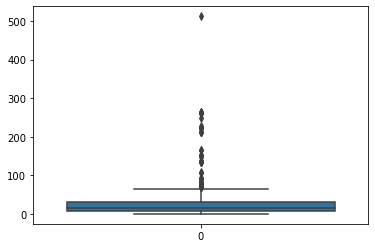

In [70]:
sns.boxplot(data=df_te['Fare'])

<AxesSubplot:>

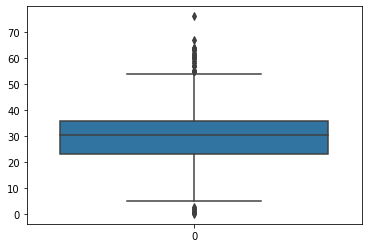

In [71]:
sns.boxplot(data=df_te['Age'])

In [73]:
from feature_engine.outliers import Winsorizer

win=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['Age','Fare'])

df_te[['Age','Fare']]=win.fit_transform(df_te[['Age','Fare']])

In [131]:
## so we checked there is no outliers 
# sns.boxplot('Fare',data=df_te

In [202]:
df_te=df_te.d

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,54.87500,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,66.9063,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


In [206]:
df_te1=df_te.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df_te1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500,0,0,7.8292,Q
1,3,female,47.000,1,0,7.0000,S
2,2,male,54.875,0,0,9.6875,Q
3,3,male,27.000,0,0,8.6625,S
4,3,female,22.000,1,1,12.2875,S


In [207]:
from sklearn.preprocessing import LabelEncoder

# call the func
le=LabelEncoder()

# fit and transform

df_te1['Sex']= le.fit_transform(df_te1['Sex'])
df_te1

df_te1['Embarked']=le.fit_transform(df_te1['Embarked'])
df_te1



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,54.87500,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,66.9063,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [208]:
from sklearn.preprocessing import MaxAbsScaler

# call func
mas=MaxAbsScaler()

# fit_transform
df_te1['Age']=mas.fit_transform(df_te1[['Age']])

df_te1['Fare']=mas.fit_transform(df_te1[['Fare']])

In [212]:
x_test=df_te1
x_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.628702,0,0,0.117017,1
1,3,0,0.856492,1,0,0.104624,2


In [215]:
x_train=x
x_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
0,3,1,0.403670,1,0,2,0.532603
1,1,0,0.697248,1,0,0,0.866175


In [217]:
y_train=y
y_train.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [218]:
from sklearn.ensemble import GradientBoostingClassifier

g_model = GradientBoostingClassifier(n_estimators=1,learning_rate=0.9)

g_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.9, n_estimators=1)

In [223]:
# y_pred_train = g_model.predict(x_train)

y_pred_test = g_model.predict(x_test)


In [228]:
y_pred_test=pd.DataFrame(y_pred_test)  # conv in dataframe
y_pred_test.head()

,0
0,0
1,0
2,0
3,0
4,0


In [225]:
sample=pd.read_csv('E:\My projects\Kaggle titanic\\gender_submission.csv')
sample.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [229]:
dataset=pd.concat([sample['PassengerId'],y_pred_test],axis=1)
dataset.head()


,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [230]:
dataset.columns=['PassengerId','Survived']

In [231]:
dataset.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [233]:
dataset.to_csv('Final_sub2.csv',index=False)

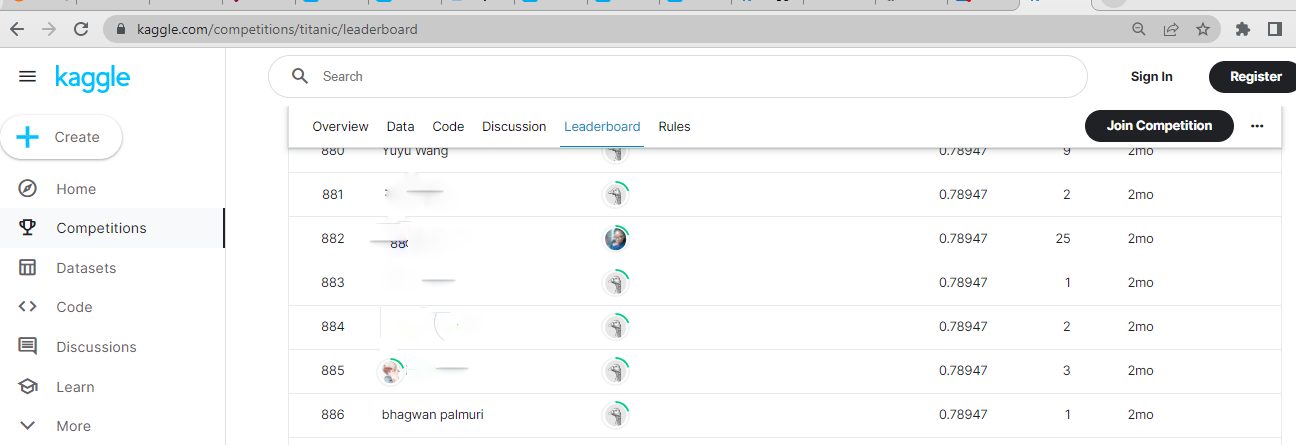

In [1]:
# 886 rank out of nearly 10,000 kagglers